In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
orig_img = cv2.imread("2023-01-04 17-13-37.JPG", cv2.IMREAD_UNCHANGED)
wm_img = cv2.imread(
    "homow-high-resolution-logo-black-on-transparent-background.png", cv2.IMREAD_UNCHANGED)
# cv2.imshow("wm_img", orig_img)
# cv2.waitKey()

(4672, 7008, 3)
(398, 2000, 4)


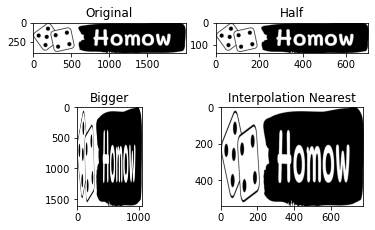

In [18]:
# print(orig_img.width(), orig_img.height)
# print(warkmark_img.shape)
# print(warkmark_img.width, warkmark_img.height)
print(orig_img.shape)
print(wm_img.shape)
scal = orig_img.shape[1]/10/wm_img.shape[1]
half = cv2.resize(wm_img, (0, 0), fx=scal, fy=scal)
bigger = cv2.resize(wm_img, (1050, 1610))

stretch_near = cv2.resize(wm_img, (780, 540),
                          interpolation=cv2.INTER_LINEAR)


Titles = ["Original", "Half", "Bigger", "Interpolation Nearest"]
wm_imgs = [wm_img, half, bigger, stretch_near]
count = 4

for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(wm_imgs[i])

plt.show()



In [15]:
def add_alpha_channel(img):
    """ 为jpg图像添加alpha通道 """

    b_channel, g_channel, r_channel = cv2.split(img)  # 剥离jpg图像通道
    alpha_channel = np.ones(
        b_channel.shape, dtype=b_channel.dtype) * 255  # 创建Alpha通道

    img_new = cv2.merge(
        (b_channel, g_channel, r_channel, alpha_channel))  # 融合通道
    return img_new


TypeError: imshow() missing 1 required positional argument: 'X'

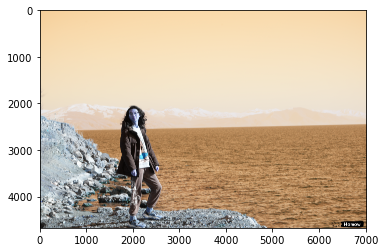

In [19]:
if orig_img.shape[2] == 3:
    orig_img = add_alpha_channel(orig_img)
# 水印位於右下角
shapexx = int(half.shape[1]*0.1)
# x1 = orig_img.shape[1] - int(half.shape[1]*1.1)
# y1 = orig_img.shape[0] - int(half.shape[0]*1.1)
x2 = orig_img.shape[1] - shapexx
y2 = orig_img.shape[0] - shapexx
x1 = x2 - half.shape[1]
y1 = y2 - half.shape[0]

alpha_png = half[:,:,3] / 255.0
alpha_jpg = 1 - alpha_png
for c in range(0,3):
    orig_img[y1:y2, x1:x2, c] = (
        (alpha_jpg*orig_img[y1:y2, x1:x2, c]) + (alpha_png*half[:, :, c]))

plt.imshow(orig_img)
# plt.imshow()

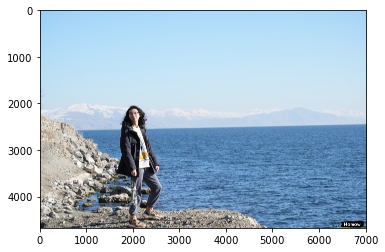

In [21]:
plt.imshow(orig_img[:,:,[2,1,0]])

In [20]:
cv2.imwrite("MyImage.jpg", orig_img)


True